In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from sklearn import mixture
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from scipy.stats import ks_2samp

from sklearn.tree import export_text

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [7]:
!cat tmp.py


    def create_4d_X_from_files():

        true_agent_labels = pd.read_csv('agents_list.csv')
        true_agent_labels.columns=['sender_id', 'true_sender_type']

        edges = pd.read_csv('nx_edges_list.csv')
        node_degs = pd.read_csv('tabular_graph_features.csv')
        #node_degs.columns=['sender_id', 'in_degree', 'out_degree']
        return edges, node_degs

        clf = mixture.GaussianMixture(n_components=2,
                                      covariance_type="full",
                                      random_state = 123)
        plt.rcParams.update(plt.rcParamsDefault)
        sns.reset_defaults()
        sns.set_context('notebook')

        clf = IsolationForest(contamination=0.1,
                              random_state = 123).fit(X)
        y_pred = clf.fit_predict(X)

        fig, ax = plt.subplots() # TODO: fix figsize to reasonable vals
        fig.patch.set_facecolor('#F9F3DC')

from sklearn import mixture
from sklearn.ensemble import IsolationForest
fro

In [8]:
# read files
true_agent_labels = pd.read_csv('agents_list.csv')
true_agent_labels.columns=['sender_id', 'true_sender_type']
edges = pd.read_csv('nx_edges_list.csv')
node_degs = pd.read_csv('tabular_graph_features.csv')
#node_degs.columns=['sender_id', 'in_degree', 'out_degree']


In [9]:
txns = pd.read_csv('./txns_list.csv')
txns['time'] = txns.timestep_to_time.apply(pd.to_datetime)
txns.dtypes
txns['y_true'] = txns.sender_type.apply(lambda x: 1 if x=='suspicious' else 0)
display(txns.sample())


,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
597,50,2022-10-31 12:30:00,334,271,normal,-4438.138132,2022-10-31 12:30:00,0


In [10]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
0,35,2022-10-31 08:45:00,1,622,normal,-2570.593062,2022-10-31 08:45:00,0
1,49,2022-10-31 12:15:00,1,842,normal,-6018.117687,2022-10-31 12:15:00,0
2,61,2022-10-31 15:15:00,1,1003,normal,-2471.066399,2022-10-31 15:15:00,0
3,42,2022-10-31 10:30:00,2,704,normal,-2077.215731,2022-10-31 10:30:00,0
4,52,2022-10-31 13:00:00,2,564,normal,-3386.779747,2022-10-31 13:00:00,0
...,...,...,...,...,...,...,...,...
1930,80,2022-10-31 20:00:00,1010,1004,suspicious,-913.295141,2022-10-31 20:00:00,1
1931,82,2022-10-31 20:30:00,1010,1003,suspicious,-606.674136,2022-10-31 20:30:00,1
1932,87,2022-10-31 21:45:00,1010,1003,suspicious,-1367.083779,2022-10-31 21:45:00,1
1933,91,2022-10-31 22:45:00,1010,1010,suspicious,-854.625186,2022-10-31 22:45:00,1


In [11]:
sender_info = pd.DataFrame(txns.sender_id.unique(), columns=['sender_id'])
sender_info['txns'] = None
sender_info['txn_mean_time'] = None
# convert datatype to numpy array
sender_info.txns = sender_info.txns.astype(object)
display(sender_info.sample())

all_my_txns = []
#for id in [1,2]:
for id in sender_info.sender_id:
    my_txns = txns[txns.sender_id == id].timestep
    #print(my_txns.to_list())
    all_my_txns.append(my_txns.to_list())
sender_info['txns'] = pd.Series(all_my_txns)
display(sender_info.iloc[1])
sender_info['txn_mean_time'] = sender_info['txns'].apply(np.mean)
#sender_info['label_by_mean_txn_time'] = 
sender_info


,sender_id,txns,txn_mean_time
79,81,None,None


sender_id                   2
txns             [42, 52, 56]
txn_mean_time            None
Name: 1, dtype: object

,sender_id,txns,txn_mean_time
0,1,"[35, 49, 61]",48.333333
1,2,"[42, 52, 56]",50.000000
2,3,"[35, 43, 52]",43.333333
3,4,[49],49.000000
4,5,[38],38.000000
...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000


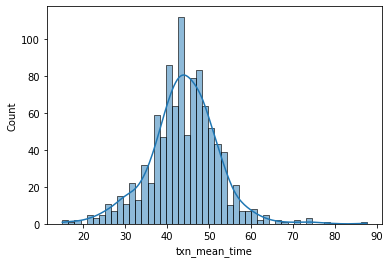

In [12]:
fig, ax = plt.subplots()
plt.set_xlim = [0,100]
sns.histplot(sender_info['txn_mean_time'], ax=ax, kde=True , bins=50)
#sns.kdeplot(sender_info['txn_mean_time'], ax=ax)
plt.show()

In [13]:
sender_info

,sender_id,txns,txn_mean_time
0,1,"[35, 49, 61]",48.333333
1,2,"[42, 52, 56]",50.000000
2,3,"[35, 43, 52]",43.333333
3,4,[49],49.000000
4,5,[38],38.000000
...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000


In [14]:
node_degs.columns=['sender_id', 'in_degree', 'out_degree']
node_degs

,sender_id,in_degree,out_degree
0,1,2,3
1,622,3,2
2,842,3,4
3,1003,23,4
4,2,2,3
...,...,...,...
1004,978,0,1
1005,979,0,1
1006,980,0,1
1007,982,0,1


In [15]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
0,35,2022-10-31 08:45:00,1,622,normal,-2570.593062,2022-10-31 08:45:00,0
1,49,2022-10-31 12:15:00,1,842,normal,-6018.117687,2022-10-31 12:15:00,0
2,61,2022-10-31 15:15:00,1,1003,normal,-2471.066399,2022-10-31 15:15:00,0
3,42,2022-10-31 10:30:00,2,704,normal,-2077.215731,2022-10-31 10:30:00,0
4,52,2022-10-31 13:00:00,2,564,normal,-3386.779747,2022-10-31 13:00:00,0
...,...,...,...,...,...,...,...,...
1930,80,2022-10-31 20:00:00,1010,1004,suspicious,-913.295141,2022-10-31 20:00:00,1
1931,82,2022-10-31 20:30:00,1010,1003,suspicious,-606.674136,2022-10-31 20:30:00,1
1932,87,2022-10-31 21:45:00,1010,1003,suspicious,-1367.083779,2022-10-31 21:45:00,1
1933,91,2022-10-31 22:45:00,1010,1010,suspicious,-854.625186,2022-10-31 22:45:00,1


In [16]:
sender_info

,sender_id,txns,txn_mean_time
0,1,"[35, 49, 61]",48.333333
1,2,"[42, 52, 56]",50.000000
2,3,"[35, 43, 52]",43.333333
3,4,[49],49.000000
4,5,[38],38.000000
...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000


In [45]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
0,35,2022-10-31 08:45:00,1,622,normal,-2570.593062,2022-10-31 08:45:00,0
1,49,2022-10-31 12:15:00,1,842,normal,-6018.117687,2022-10-31 12:15:00,0
2,61,2022-10-31 15:15:00,1,1003,normal,-2471.066399,2022-10-31 15:15:00,0
3,42,2022-10-31 10:30:00,2,704,normal,-2077.215731,2022-10-31 10:30:00,0
4,52,2022-10-31 13:00:00,2,564,normal,-3386.779747,2022-10-31 13:00:00,0
...,...,...,...,...,...,...,...,...
1930,80,2022-10-31 20:00:00,1010,1004,suspicious,-913.295141,2022-10-31 20:00:00,1
1931,82,2022-10-31 20:30:00,1010,1003,suspicious,-606.674136,2022-10-31 20:30:00,1
1932,87,2022-10-31 21:45:00,1010,1003,suspicious,-1367.083779,2022-10-31 21:45:00,1
1933,91,2022-10-31 22:45:00,1010,1010,suspicious,-854.625186,2022-10-31 22:45:00,1


In [46]:
sender_infoj

,sender_id,txns,txn_mean_time,in_degree,out_degree,true_sender_type,y_true_type
0,1,"[35, 49, 61]",48.333333,2,3,normal,0
1,2,"[42, 52, 56]",50.000000,2,3,normal,0
2,3,"[35, 43, 52]",43.333333,4,3,normal,0
3,4,[49],49.000000,1,1,normal,0
4,5,[38],38.000000,0,1,normal,0
...,...,...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,17,7,suspicious,1
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,18,8,suspicious,1
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,15,8,suspicious,1
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,18,7,suspicious,1


In [49]:
sender_info.txns.apply(lambda x: len(x))
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,true_sender_type,y_true_type
0,1,"[35, 49, 61]",48.333333,2,3,normal,0
1,2,"[42, 52, 56]",50.000000,2,3,normal,0
2,3,"[35, 43, 52]",43.333333,4,3,normal,0
3,4,[49],49.000000,1,1,normal,0
4,5,[38],38.000000,0,1,normal,0
...,...,...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,17,7,suspicious,1
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,18,8,suspicious,1
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,15,8,suspicious,1
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,18,7,suspicious,1


In [54]:
X = sender_info[['txn_mean_time', 'in_degree', 'out_degree','y_true_type']]

In [64]:
X


,txn_mean_time,in_degree,out_degree,y_true_type
0,48.333333,2,3,0
1,50.000000,2,3,0
2,43.333333,4,3,0
3,49.000000,1,1,0
4,38.000000,0,1,0
...,...,...,...,...
992,87.571429,17,7,1
993,74.444444,18,8,1
994,70.444444,15,8,1
995,66.375000,18,7,1


In [86]:
features

,txn_mean_time,in_degree,out_degree
0,48.333333,2,3
1,50.000000,2,3
2,43.333333,4,3
3,49.000000,1,1
4,38.000000,0,1
...,...,...,...
992,87.571429,17,7
993,74.444444,18,8
994,70.444444,15,8
995,66.375000,18,7


In [83]:
from sklearn import tree
features = sender_info[['txn_mean_time', 'in_degree', 'out_degree']]


DecisionTreeClassifier(max_depth=1)

In [106]:
sender_info['num_txns'] = sender_info.txns.apply(len)

,sender_id,txns,txn_mean_time,in_degree,out_degree,true_sender_type,y_true_type,num_txns
0,1,"[35, 49, 61]",48.333333,2,3,normal,0,3
1,2,"[42, 52, 56]",50.000000,2,3,normal,0,3
2,3,"[35, 43, 52]",43.333333,4,3,normal,0,3
3,4,[49],49.000000,1,1,normal,0,1
4,5,[38],38.000000,0,1,normal,0,1
...,...,...,...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,17,7,suspicious,1,7
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,18,8,suspicious,1,9
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,15,8,suspicious,1,9
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,18,7,suspicious,1,8


In [188]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, features, sender_info.y_true_type, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [115]:
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,true_sender_type,y_true_type,num_txns
0,1,"[35, 49, 61]",48.333333,2,3,normal,0,3
1,2,"[42, 52, 56]",50.000000,2,3,normal,0,3
2,3,"[35, 43, 52]",43.333333,4,3,normal,0,3
3,4,[49],49.000000,1,1,normal,0,1
4,5,[38],38.000000,0,1,normal,0,1
...,...,...,...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,17,7,suspicious,1,7
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,18,8,suspicious,1,9
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,15,8,suspicious,1,9
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,18,7,suspicious,1,8


In [ ]:
sender_

In [118]:
sender_info.shape

(997, 8)

In [124]:
np.random.random((19,2))

array([[0.09244698, 0.81985677],
       [0.22079956, 0.99457738],
       [0.73282224, 0.00999787],
       [0.82163686, 0.15143257],
       [0.06934432, 0.30124336],
       [0.27535698, 0.19585211],
       [0.61576084, 0.67782466],
       [0.84126075, 0.56582353],
       [0.27090695, 0.57865772],
       [0.08556814, 0.9013116 ],
       [0.08469252, 0.24819105],
       [0.61118085, 0.36919446],
       [0.74753949, 0.46972319],
       [0.66844633, 0.16436481],
       [0.33549433, 0.14316069],
       [0.76042809, 0.36690048],
       [0.48296493, 0.78354673],
       [0.32838997, 0.52653884],
       [0.1205693 , 0.0900719 ]])

# tRee

[Text(0.6666666666666666, 0.875, 'X[0] <= 6.5\ngini = 0.02\nsamples = 997\nvalue = [987, 10]'),
 Text(0.5, 0.625, 'X[0] <= 5.5\ngini = 0.008\nsamples = 991\nvalue = [987, 4]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 3.5\ngini = 0.006\nsamples = 988\nvalue = [985, 3]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 924\nvalue = [924, 0]'),
 Text(0.5, 0.125, 'gini = 0.089\nsamples = 64\nvalue = [61, 3]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

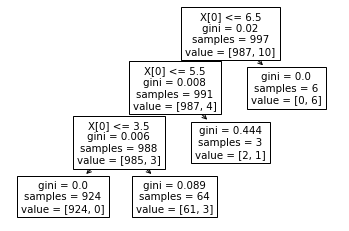

In [164]:
X = sender_info[['txn_mean_time', 'in_degree', 'out_degree', 'num_txns']]
X = sender_info[['in_degree', 'out_degree', 'num_txns']]
X = sender_info[['in_degree', 'out_degree']]
X = sender_info[['in_degree']]
X = sender_info[['out_degree']]
#X = sender_info[['num_txns']]
#X = sender_info[['txn_mean_time']]
#X = np.random.random(sender_info.shape)
y_true = sender_info.y_true_type

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y_true)
tree.plot_tree(clf, max_depth=10)

In [141]:
y_pred = clf.predict(X)

In [144]:
sender_info.columns

Index(['sender_id', 'txns', 'txn_mean_time', 'in_degree', 'out_degree',
       'true_sender_type', 'y_true_type', 'num_txns', 'y_pred'],
      dtype='object')

In [147]:
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,true_sender_type,y_true_type,num_txns,y_pred
0,1,"[35, 49, 61]",48.333333,2,3,normal,0,3,0
1,2,"[42, 52, 56]",50.000000,2,3,normal,0,3,0
2,3,"[35, 43, 52]",43.333333,4,3,normal,0,3,0
3,4,[49],49.000000,1,1,normal,0,1,0
4,5,[38],38.000000,0,1,normal,0,1,0
...,...,...,...,...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,17,7,suspicious,1,7,1
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,18,8,suspicious,1,9,1
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,15,8,suspicious,1,9,1
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,18,7,suspicious,1,8,1


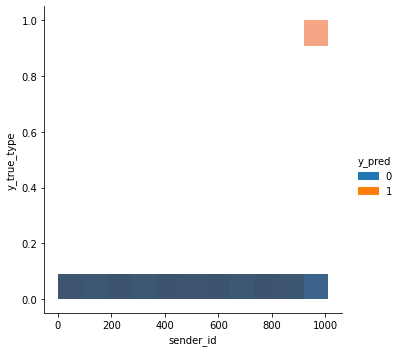

In [150]:
sender_info['y_pred'] = y_pred
sns.displot(
data=sender_info, x='sender_id', y='y_true_type', hue='y_pred')


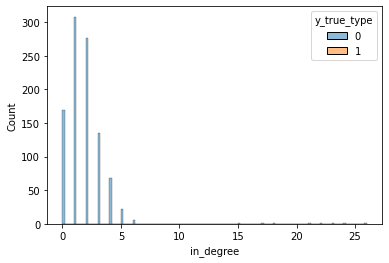

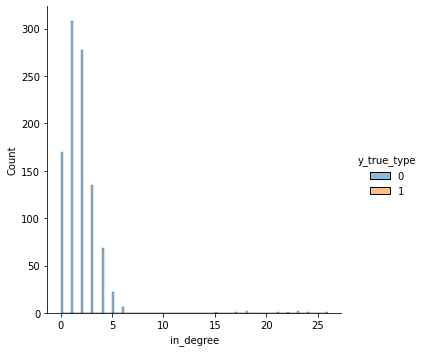

In [155]:
sns.histplot(data=sender_info, x='in_degree', hue='y_true_type')
sns.displot(data=sender_info, x='in_degree', hue='y_true_type')

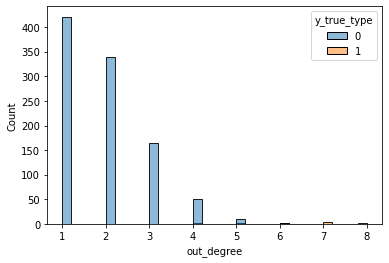

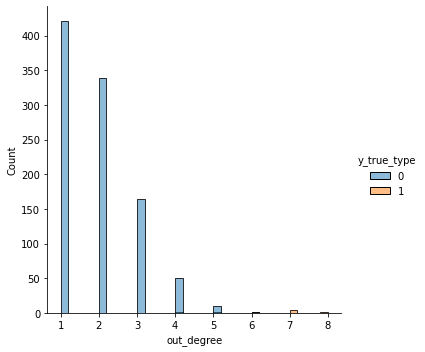

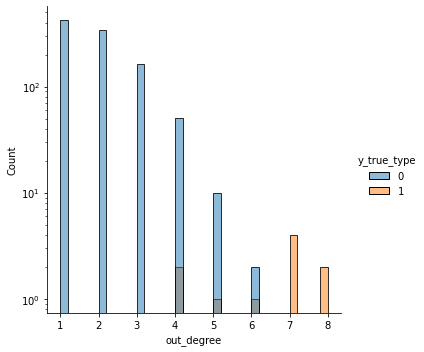

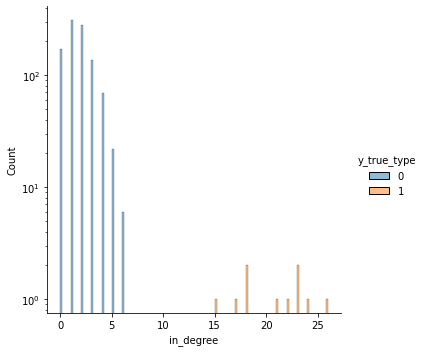

In [163]:
sns.histplot(data=sender_info, x='out_degree', hue='y_true_type')
sns.displot(data=sender_info, x='out_degree', hue='y_true_type')
g1 = sns.displot(data=sender_info, x='out_degree', hue='y_true_type', )
g1.set(yscale='log')
g2 = sns.displot(data=sender_info, x='in_degree', hue='y_true_type', )
g2.set(yscale='log')
#sns.displot(data=sender_info[sender_info.y_true_type==1], x='out_degree', hue='y_true_type')
#sns.displot(data=sender_info[sender_info.y_true_type==0], x='out_degree', hue='y_true_type')

In [ ]:
# what is mean out degree of true vs false
# what is mea in degree

In [67]:

sender_info = sender_info.merge(true_agent_labels)

In [69]:
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,true_sender_type,y_true_type
0,1,"[35, 49, 61]",48.333333,2,3,normal,0
1,2,"[42, 52, 56]",50.000000,2,3,normal,0
2,3,"[35, 43, 52]",43.333333,4,3,normal,0
3,4,[49],49.000000,1,1,normal,0
4,5,[38],38.000000,0,1,normal,0
...,...,...,...,...,...,...,...
992,1006,"[78, 81, 84, 87, 93, 94, 96]",87.571429,17,7,suspicious,1
993,1007,"[1, 73, 80, 81, 82, 86, 88, 89, 90]",74.444444,18,8,suspicious,1
994,1008,"[2, 52, 70, 77, 83, 84, 85, 87, 94]",70.444444,15,8,suspicious,1
995,1009,"[2, 19, 74, 79, 84, 85, 93, 95]",66.375000,18,7,suspicious,1


In [71]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X, sender_info.y_true_type)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# export x 

In [30]:
sender_info.drop(['y_pred'], axis=1).to_csv('processed_for_X.csv')

KeyError: "['y_pred'] not found in axis"

In [12]:
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
992,1006,suspicious
993,1007,suspicious
994,1008,suspicious
995,1009,suspicious


In [73]:
X_dtree

NameError: name 'jX_dtree' is not defined

In [75]:
# X = txns.time.to_numpy().reshape(-1,1) # nah... let's just use integers
X = txns.timestep.to_numpy().reshape(-1,1)
X.shape

(1935, 1)

In [ ]:
true_agent_labels

In [ ]:
true_agent_labels['true_label'] = true_agent_labels['true_sender_type'] != 'normal'  
# note that 0 = normal
true_agent_labels['true_label'] *= 1
true_agent_labels

In [ ]:
#  Create a simple logistic regression classifier for agent type. The input features are:
#– Timing of the ATM transactions
#- Time of day
#- Number of transactions
#– In- and out- degrees of each account
#– Note: For simplicity all nodes are labelled, though in reality very few are
#• Compare results on real and synthetic data

In [ ]:
# time (mean)
# num of txns for agent
# in degrees
# out degress

# restart

In [177]:
X

,out_degree
0,3
1,3
2,3
3,1
4,1
...,...
992,7
993,8
994,8
995,7


In [28]:
def reset_X():
    X = sender_info[['txn_mean_time', 'in_degree', 'out_degree','y_true_type', 'num_txns']]
    X = X.rename(columns={'y_true_type': 'y_true'})
    print('reset X, sample X', X.sample())

In [29]:
X = sender_info[['txn_mean_time', 'in_degree', 'out_degree','y_true', 'num_txns']]
X = X.rename(columns={'y_true_type': 'y_true'})
X

KeyError: "['y_true', 'num_txns'] not in index"

In [ ]:
clf = mixture.GaussianMixture(n_components=2,
                                covariance_type="full",
                                random_state = 123)
plt.rcParams.update(plt.rcParamsDefault)
sns.reset_defaults()
sns.set_context('notebook')

clf = IsolationForest(contamination=0.1,
                        random_state = 123).fit(X)
y_pred = clf.fit_predict(X)

fig, ax = plt.subplots() # TODO: fix figsize to reasonable vals
fig.patch.set_facecolor('#F9F3DC')

In [ ]:
def try_GMM():
    clf = mixture.GaussianMixture(n_components=2,
                                covariance_type="full",
                                random_state = 123)
    clf = clf.fit(X, y_true)
# classify against ... uh.... 
# let's see..



#def try_IF():
